In [21]:
import numpy as np
import glob
import os

from sklearn.model_selection import StratifiedKFold as skf
from Extract.hiragana import basic_hiragana_char
from Extract.katakana import basic_katakana_char

In [22]:
ETL1_PATH = "Extract//ETL1//IMG_WHITE1"
ETL8_PATH = "Extract//ETL8G//IMG_WHITE"
ETL9_PATH = "Extract//ETL9B//IMG_WHITE"

In [23]:
# Load All Image Path
ETL1_list = glob.glob(ETL1_PATH + "//*.png")
ETL8_list = glob.glob(ETL8_PATH + "//*.png")
ETL9_list = glob.glob(ETL9_PATH + "//*.png")

In [24]:
# Make all image path became one list
dataset_paths = []
dataset_paths.extend(ETL1_list)
dataset_paths.extend(ETL8_list)
dataset_paths.extend(ETL9_list)
dataset_paths = np.asarray(dataset_paths)

In [25]:
# Make List of Label in One Array
japanese_character = []
japanese_character.extend(basic_hiragana_char)
japanese_character.extend(basic_katakana_char)

In [26]:
# Label total
len(japanese_character)

92

In [27]:
# Extracting Label from Files Name
print(ETL1_list[0].split("\\")[1].split("_")[1])
print(ETL8_list[0].split("\\")[1].split("_")[1])
print(ETL9_list[0].split("\\")[1].split("_")[1])

ケ-ke
ほ-ho
あ-a


In [28]:
# Extract Label

dataset_label = []
dataset_raw_label = []
for idx, string_path in enumerate(dataset_paths):
    label = string_path.split("\\")[1].split("_")[1]
    
    for idx1, chara in enumerate(japanese_character):
        #print(label, chara)
        if label == chara:
            dataset_label.append(idx1)
            dataset_raw_label.append(label)
            break
    
dataset_label = np.asarray(dataset_label)
dataset_raw_label = np.asarray(dataset_raw_label)

In [29]:
len(dataset_paths)

85786

In [30]:
# Test the correctness
print("Label {} with character {}".format(str(dataset_label[0]), japanese_character[dataset_label[0]]))
print("Label {} with character {}".format(str(dataset_label[10000]), japanese_character[dataset_label[10000]]))
print("Label {} with character {}".format(str(dataset_label[2000]), japanese_character[dataset_label[2000]]))
print("Label {} with character {}".format(str(dataset_label[1000]), japanese_character[dataset_label[1000]]))

print(dataset_paths[0])
print(dataset_paths[10000])
print(dataset_paths[2000])
print(dataset_paths[1000])
print(dataset_paths[68719])

len(dataset_raw_label)

Label 54 with character ケ-ke
Label 67 with character ニ-ni
Label 62 with character チ-chi
Label 61 with character タ-ta
Extract//ETL1//IMG_WHITE1\0_ケ-ke_kana.png
Extract//ETL1//IMG_WHITE1\19002_ニ-ni_kana.png
Extract//ETL1//IMG_WHITE1\11800_チ-chi_kana.png
Extract//ETL1//IMG_WHITE1\10900_タ-ta_kana.png
Extract//ETL1//IMG_WHITE1\9628_ソ-so_kana.png


85786

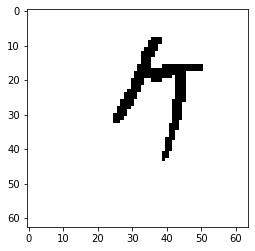

In [31]:
import cv2
import matplotlib.pyplot as plt

# Test Loaded Image
image = cv2.imread(dataset_paths[0], cv2.COLOR_GRAY2RGB)
plt.imshow(image)

In [32]:
skf_model = skf(n_splits=4, random_state=10, shuffle=True)
for train_idx, test_idx in skf_model.split(dataset_paths, dataset_label):
    x_paths_train, y_train, y_train_raw = dataset_paths[train_idx] , dataset_label[train_idx], dataset_raw_label[train_idx]
    x_paths_test, y_test, y_test_raw = dataset_paths[test_idx] , dataset_label[test_idx], dataset_raw_label[test_idx]

In [33]:
# Find the unbalanced class

from collections import Counter

maximum = []
temp = y_train
counter = Counter(np.sort(temp))
for k, v in counter.items():
    per= v / len(temp) * 100
    maximum.append(v)
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=271 (0.421%)
Class=1, n=272 (0.423%)
Class=2, n=272 (0.423%)
Class=3, n=271 (0.421%)
Class=4, n=272 (0.423%)
Class=5, n=271 (0.421%)
Class=6, n=272 (0.423%)
Class=7, n=271 (0.421%)
Class=8, n=272 (0.423%)
Class=9, n=271 (0.421%)
Class=10, n=272 (0.423%)
Class=11, n=271 (0.421%)
Class=12, n=271 (0.421%)
Class=13, n=271 (0.421%)
Class=14, n=272 (0.423%)
Class=15, n=271 (0.421%)
Class=16, n=272 (0.423%)
Class=17, n=271 (0.421%)
Class=18, n=272 (0.423%)
Class=19, n=271 (0.421%)
Class=20, n=272 (0.423%)
Class=21, n=271 (0.421%)
Class=22, n=272 (0.423%)
Class=23, n=271 (0.421%)
Class=24, n=272 (0.423%)
Class=25, n=271 (0.421%)
Class=26, n=272 (0.423%)
Class=27, n=271 (0.421%)
Class=28, n=272 (0.423%)
Class=29, n=271 (0.421%)
Class=30, n=272 (0.423%)
Class=31, n=272 (0.423%)
Class=32, n=271 (0.421%)
Class=33, n=272 (0.423%)
Class=34, n=271 (0.421%)
Class=35, n=272 (0.423%)
Class=36, n=271 (0.421%)
Class=37, n=272 (0.423%)
Class=38, n=271 (0.421%)
Class=39, n=272 (0.423%)
Class=40, 

In [34]:
# Create dictionary to mapping the classes

new_dict = {new_list: [] for new_list in range(2)}
maximum_class = max(maximum)

In [35]:
for idx, label_sum in enumerate(maximum):
    if label_sum <= maximum_class:
        new_dict[0].append(idx)
        new_dict[1].append(round(maximum_class/label_sum))

In [36]:
# Validating the Cross validation
print("Path '{}' with label {}".format(x_paths_train[0], y_train[0]))

Path 'Extract//ETL1//IMG_WHITE1\10003_タ-ta_kana.png' with label 61


Label 'タ-ta'


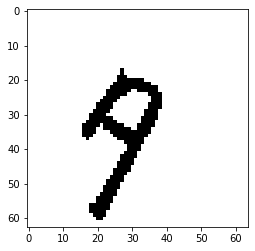

In [37]:
image = cv2.imread(x_paths_train[0], cv2.COLOR_GRAY2RGB)
plt.imshow(image)

print("Label '{}'".format(japanese_character[y_train[0]]))

In [38]:
import json

file = open("Utils/class_require_augment.json", "w")
json.dump(new_dict, file)
file.close()

In [39]:
np.savez("Utils/dataset_train.npz", x_path=x_paths_train, y_train=y_train, y_train_raw=y_train_raw)
np.savez("Utils/dataset_test.npz", x_path=x_paths_test, y_train=y_test, y_train_raw=y_test_raw)